In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [19]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [20]:
# Function to automate splitting up the GOES flux 

def goes_flux(df, flux_column):
    a = df[ (flux_column < -7.0) ]  
    b = df[ (flux_column >= -7.0) & (flux_column < -6.0) ]  
    c = df[ (flux_column >= -6.0) & (flux_column < -5.0) ]  
    m = df[ (flux_column >= -5.0) & (flux_column < -4.0) ]  
    x = df[ (flux_column >= -4.0) ]
    
    return a, b, c, m, x

In [34]:
# CME speeds
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0) & (dfsp.cme_speed < 1000) ]  
s2 = dfsp[ (dfsp.cme_speed >= 1000) & (dfsp.cme_speed < 2000) ]  
s3 = dfsp[ (dfsp.cme_speed >= 2000) & (dfsp.cme_speed < 3000) ]  
s4 = dfsp[ (dfsp.cme_speed >= 3000) ]


#==== FLARES ======================================================================================================

# R-value histogram
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)
aq, bq, cq, mq, xq = goes_flux(dfq, dfq.goes_flux)  

#==================================================================================================================

# Total flux histogram
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)
af, bf, cf, mf, xf = goes_flux(df2, df2.goes_flux)  

#==================================================================================================================

# WLSG histogram
dfw = df[['goes_flux', 'smart_wlsg']]
dfw = dfw.dropna(how='any')
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]
dfw = dfw.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfw.goes_flux = np.log10(dfw.goes_flux)
aw, bw, cw, mw, xw = goes_flux(dfw, dfw.goes_flux) 

#==================================================================================================================

# SRS area histogram
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)
a2, b2, c2, m2, x2 = goes_flux(dfsm, dfsm.goes_flux)  

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#a2cm = a2.smart_total_area.values*3.0E16
#b2cm = b2.smart_total_area.values*3.0E16
#c2cm = c2.smart_total_area.values*3.0E16
#m2cm = m2.smart_total_area.values*3.0E16
#x2cm = x2.smart_total_area.values*3.0E16

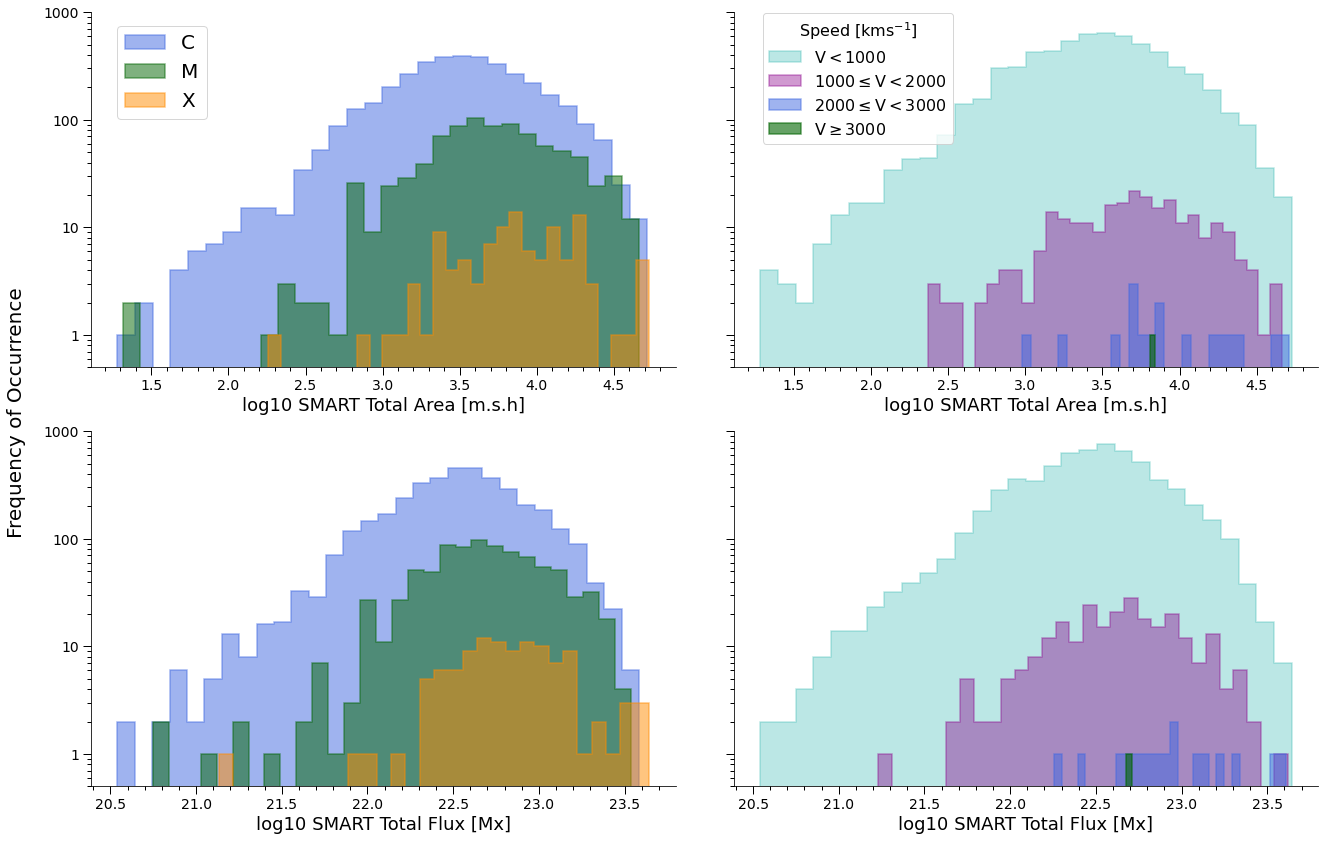

In [54]:
# Plotting flare step-hists
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')
#fig.subplots_adjust(wspace=0.15)

# Area
nc, bc, pc = ax1.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax1.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax1.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.legend(loc=[0.045,0.70], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#===============================================================================================================================

# Sunspot area with relation to CME speed 
na, ba, pa = ax2.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                      ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3,
                      label=r'$\mathrm{V} < 1000$')

nb, bb, pb = ax2.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                      ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4,
                      label=r'$1000 \leq \mathrm{V} < 2000$')

nc, bc, pc = ax2.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                      ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5,
                      label=r'$2000 \leq \mathrm{V} < 3000$')

nm, bm, pm = ax2.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                      ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6,
                      label=r'$\mathrm{V} \geq 3000$')

#\mathrm{V}_{\mathrm{CME}}

ax2.set_yscale('log')
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
leg = ax2.legend(loc=[0.05,0.63], fontsize=16, title='Speed [kms$^{-1}$]', title_fontsize=16)

plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



#===============================================================================================================================


# Total flux
nc, bc, pc = ax3.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax3.legend(loc=[0.045,0.75], fontsize=18)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


#===============================================================================================================================


# Flux with relation to CME speed
na, ba, pa = ax4.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3)
nb, bb, pb = ax4.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4)
nc, bc, pc = ax4.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5)
nm, bm, pm = ax4.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6)

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

fig.text(-0.020, 0.5, 'Frequency of Occurrence', va='center', rotation='vertical', fontsize=20)

#plt.tight_layout()
plt.tight_layout(w_pad=5)
#plt.savefig('flux_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()